# In class project for Monday 11/16 (due date Monday 11/23)

# Clustering 

Our vision and visual brain are extremely efficient at identifying groups of objects in space. Achieving the same result using algorithmic calculation is nontrivial. **Clustering** is an example of **unsupervised learning**, i.e. works on unlabeled (no target) data.

Consider the following toy datasets in two dimensions (for easy visualization):

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets

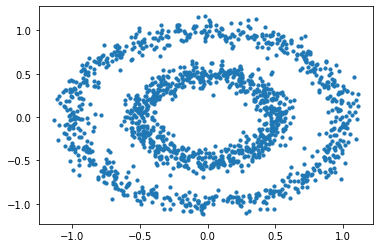

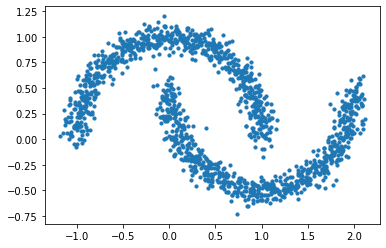

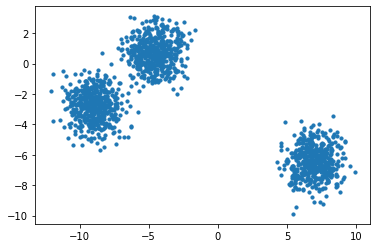

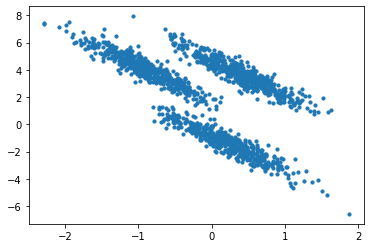

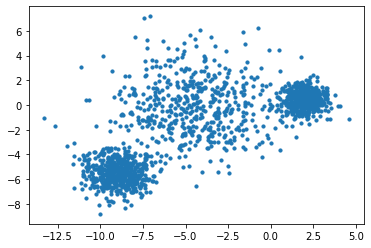

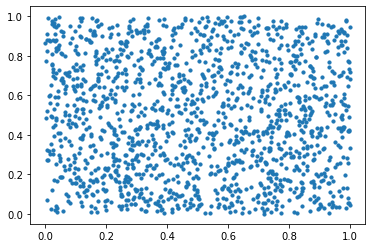

In [5]:
# reproducability
np.random.seed(0)
# sample size
n_samples = 1500
# dot size for scatter plots. Choose a smaller dotsize for larger sample sizes.
dotsize =10

# Cluster 1 
plt.figure() 
X1, y1 = datasets.make_circles(n_samples=n_samples, factor=0.5,noise=0.07)
plt.scatter(X1[:, 0], X1[:, 1],s=dotsize)
# Cluster 2 
plt.figure()
X2, y2 = datasets.make_moons(n_samples=n_samples, noise=.07)
plt.scatter(X2[:, 0], X2[:, 1],s=dotsize)
# Cluster 3 
plt.figure()
X3, y3 = datasets.make_blobs(n_samples=n_samples, random_state=15)
plt.scatter(X3[:, 0], X3[:, 1],s=dotsize)
# Cluster 4 
plt.figure()
X_raw, y4 = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.2, -0.9], [-0.4, 0.8]]
X4 = np.dot(X_raw, transformation)
plt.scatter(X4[:, 0], X4[:, 1],s=dotsize)
# Cluster 5 
plt.figure()
X5,y5 = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.7],
                             random_state=170)
plt.scatter(X5[:, 0], X5[:, 1],s=dotsize)
# Cluster 6
plt.figure()
X6 = np.random.rand(n_samples, 2)
y6 = np.zeros(n_samples,dtype=np.int8)
plt.scatter(X6[:, 0], X6[:, 1],s=dotsize)
plt.show() 

The target vector *y* contains the grouping used in generating the data. 
It can be used to measure the accuracy of the assignments of the clustering algorithms
but it not used as input.

Introducing colors

Colors in matplotlib

https://matplotlib.org/3.1.1/api/colors_api.html

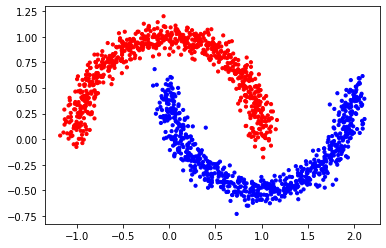

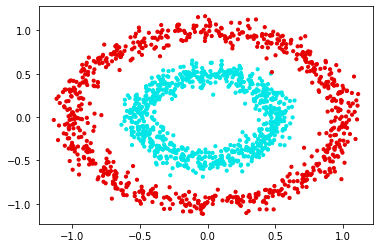

In [8]:
colors1 = np.array(['r','b','g'])
plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], s=dotsize, color=colors1[y2])

# predefined colors
colors2 = np.array(['r','b','g'])
# colors as red,green blue value in hex
colors3 = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c','#dede00'])
                                             # colors as red,green blue value as tuple
colors4 = np.array([(0.9,0.0,0.0),(0.0,0.9,0.9),(0.5,0.5,0.1)])
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], s=dotsize, color=colors4[y1])
plt.show()

# Clustering algorithms

We learned three algorithms for unsupervised learning:

## K-means
https://scikit-learn.org/stable/modules/clustering.html#k-means
## Hierarchical clustering
https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
## Gaussian Mixture Models
https://scikit-learn.org/stable/modules/mixture.html#mixture

Many more algorithms exist and are available in sklearn, see (https://scikit-learn.org/stable/modules/clustering.html)


# Project for Monday 11/16 (due date Monday 11/23)

Apply the three algorithms discussed in class to the six datasets in this notebook. Perform the following tasks and/or answer the following questions:

1. Read the description of the algorithm and estimate for which datasets the method will succeed or fail.
1. What parameters does the cluster algorithm need and what do they do? Demonstrate by varying the parameters.
1. Visualize your results. 
1. For which dataset did the algorithms succeed and for which ones did they fail. Can you explain why?
1. It is allowed to start from example codes from the sklearn website (or elsewhere) for this project as long as you reference the original code (provide a www link).
1. (optional, for extra credit) choose one other clstering algorithm and explain how it works. Apply tot the six data sets as outlined for the other methods.
1. Submit via canvas.

In [10]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import mixture

### For KMeans 
Answers to prompt: 

1. For datasets 1, 2, and 6 will most likely fail and 3, 4, 5 will most likely succeed though I predict 4 might fail as well. 

2. The parameters for KMeans are:
    
- **init** : Controls the initialization technique. Can either be "random" which is the default or "k-means++" which employs an advanced trick to speed up convergence

- **n_clusters** : Sets k for the clustering step. 

- **n_init** : Sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

- **max_iter** : Sets the number of maximum iterations for each initialization of the k-means algorithm.

3. For visualization, see below. 

4. For datasets 3, 5, and possibly 6 the algorithm appears to have succeeded. For datasets 1, 2, 4, the algorithm failed. My understanding of KMeans is that it is dependent on finding the center of the cluster which does not exists for exotic shapes like the moon or the enclosed circles or the extended streaks. As such, not being able to identify the center resulted in a failed application of the algorithm. 


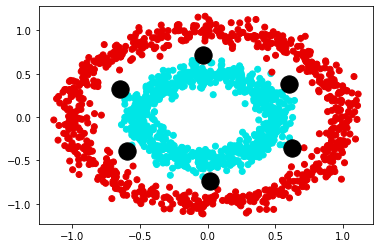

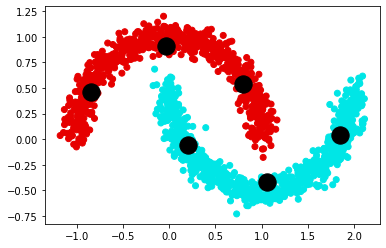

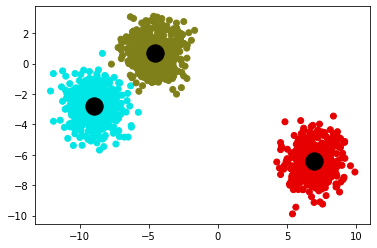

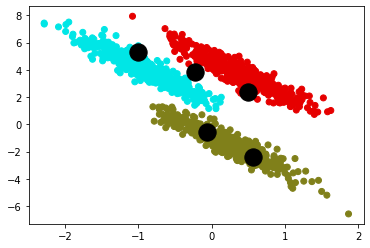

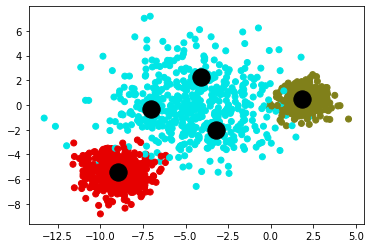

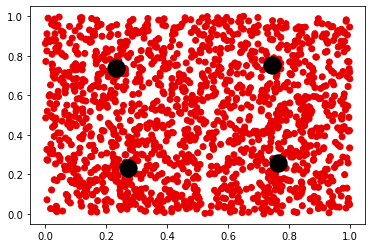

In [55]:
# Guide from: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
# To find the optimal number of clusters, we will use the elbow method 
# The elbow method states that the optimal number of cluster is derived from the value which a decrease in linear fashion is evident 

def optimal_cluster(data): 
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

# Defining a function that generates the cluster centers 
def kvisual(datax, datay, cluster):
    kmeans = KMeans(n_clusters = cluster, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    pred_y = kmeans.fit_predict(datax)
    plt.scatter(datax[:,0], datax[:,1], c = colors4[datay])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black')
    plt.show()

# Finding optimal cluster number
# optimal_cluster(X1)
# optimal_cluster(X2)
# optimal_cluster(X3)
# optimal_cluster(X4)
# optimal_cluster(X5)
# optimal_cluster(X6)

# From the elbow methods the optimal number of clusters are as such
c1 = 6 
c2 = 6
c3 = 3
c4 = 5 
c5 = 5
c6 = 4

# Visualizing KMeans data 
kvisual(X1, y1, c1)
kvisual(X2, y2, c2)
kvisual(X3, y3, c3)
kvisual(X4, y4, c4)
kvisual(X5, y5, c5)
kvisual(X6, y6, c6)